# Decision Tree Implementation by Akhil

#### Importing basic libraries

In [1]:
import numpy as np
import pandas as pd

### Import the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Jyothi Nair\Desktop\AI-ML\datasets\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking null values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checknig the number of targets wrt to labels

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

### Age

Text(0.5, 1.0, 'Age')

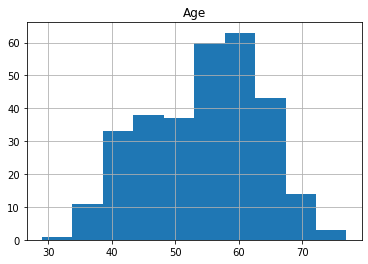

In [11]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


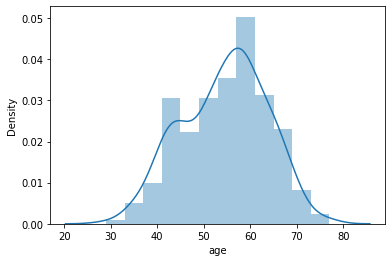

In [12]:
sns.distplot(df['age'])

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

### Sex

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


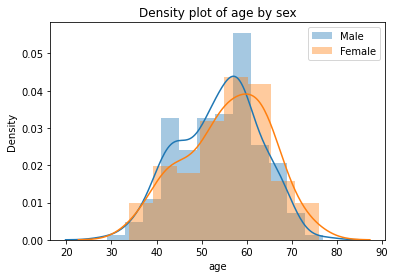

In [13]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

### Trestbps

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

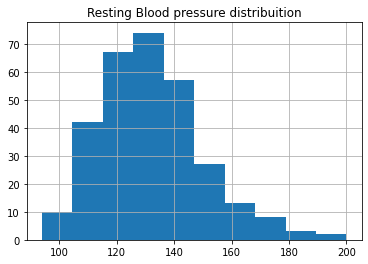

In [14]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


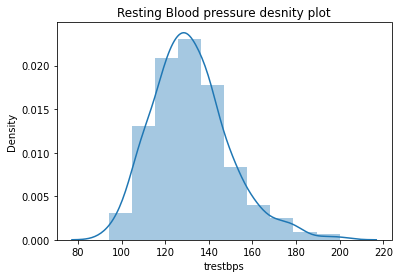

In [15]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, we are having a normal distribution

### chol	

Text(0.5, 1.0, 'chol')

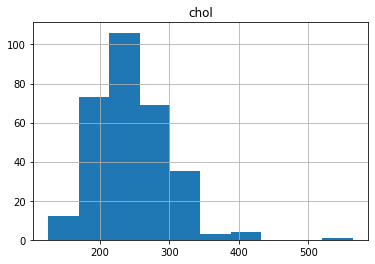

In [16]:
df['chol'].hist()
plt.title('chol')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


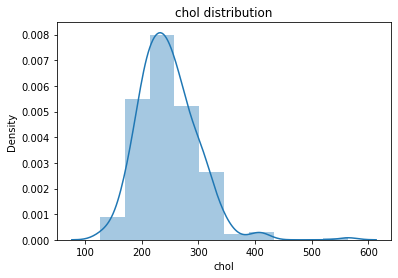

In [17]:
sns.distplot(df['chol'], bins=10)
plt.title('chol distribution');

### thalach

Text(0.5, 1.0, 'thalach')

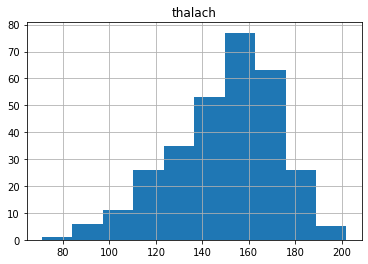

In [19]:
df['thalach'].hist()
plt.title('thalach')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


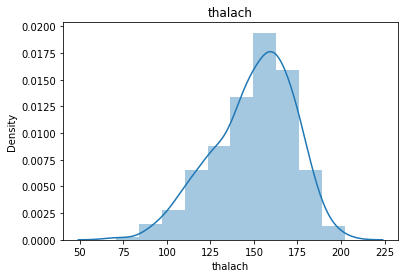

In [20]:
sns.distplot(df['thalach'], bins=10)
plt.title('thalach');

### Corr

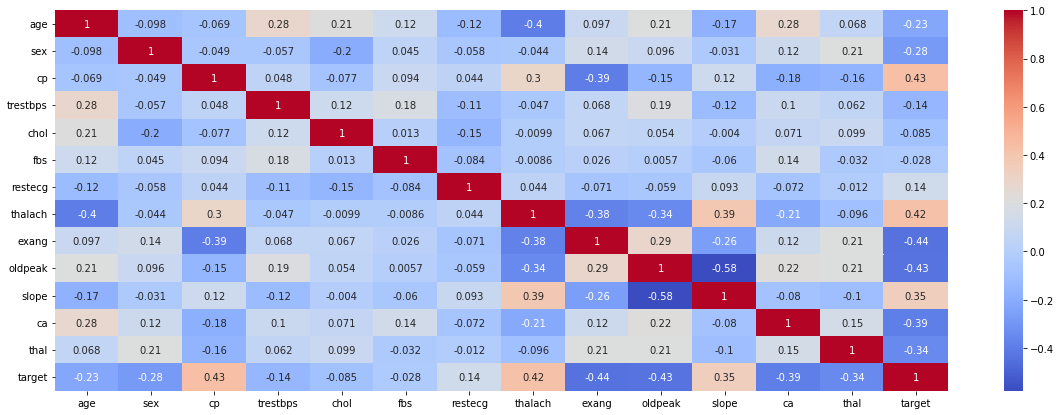

In [21]:
plt.rcParams['figure.figsize'] = (20,7)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### target

Text(0.5, 1.0, 'Count of target feature by sex')

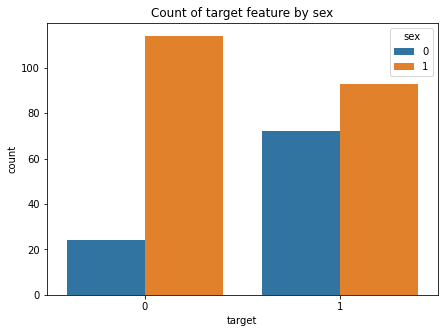

In [22]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

## Train Test Split

In [23]:
X = df.iloc[:, :-1]
y = df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=34, train_size=0.7)

## Model Building

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_test_pred = clf.predict(x_test)

## Perofrmance Metrics

In [30]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test_pred,y_test)

0.8241758241758241

In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.84      0.84      0.84        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test_pred,y_test)

array([[32,  8],
       [ 8, 43]])

## Plot the tree

[Text(0.4882075471698113, 0.9375, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = a'),
 Text(0.2358490566037736, 0.8125, 'ca <= 0.5\ngini = 0.398\nsamples = 102\nvalue = [74, 28]\nclass = t'),
 Text(0.14150943396226415, 0.6875, 'thal <= 2.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]\nclass = a'),
 Text(0.07547169811320754, 0.5625, 'exang <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = a'),
 Text(0.03773584905660377, 0.4375, 'thalach <= 96.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = a'),
 Text(0.018867924528301886, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = t'),
 Text(0.05660377358490566, 0.3125, 'chol <= 316.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = a'),
 Text(0.03773584905660377, 0.1875, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = a'),
 Text(0.07547169811320754, 0.1875, 'chol <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = t'),
 Text(0.05660377358490566, 0.0625, 'gini = 0.0\nsamples = 1\nvalue 

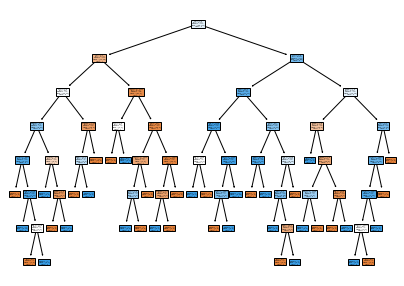

In [67]:
tree.plot_tree(clf,feature_names=X.columns,class_names='target',filled=True)